<a href="https://colab.research.google.com/github/valanm22/The-One-with-the-Analysis/blob/main/Friends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd       # for dataframes

import nltk
nltk.download('punkt')
from nltk import word_tokenize        # for text processing

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from wordcloud import WordCloud

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
data_url = 'https://raw.githubusercontent.com/shilpibhattacharyya/Friends_Analysis/master/friends_dataset.csv'
data = pd.read_csv(data_url)
data.head()

,Unnamed: 0,Location,Scene,Season,Speaker,Text
0,0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?
1,1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?"
2,2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g..."
3,3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.
4,4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!


In [6]:
data['Text'] = data['Text'].astype(str)       
data['Tokenized Sentences'] = data.apply(lambda row: word_tokenize(row['Text']), axis=1)        # column with tokenized sentences    

In [7]:
data.head()

,Unnamed: 0,Location,Scene,Season,Speaker,Text,Tokenized Sentences
0,0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?,"[What, ?]"
1,1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?","[Oh, ,, you, got, the, whole, night, ,, huh, ?]"
2,2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g...","[Phoebe, is, going, to, say, ``, yes, '', ?, T..."
3,3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.,"[Yeah, .]"
4,4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!,"[Oh, !]"


In [8]:
data['Tokenized Words Alphanumeric'] = data['Tokenized Sentences'].apply(lambda x: [item for item in x if item.isalnum()])        # column with only alphanumeric values
data['Word Count'] = data['Tokenized Words Alphanumeric'].apply(len)

In [9]:
data.head()

,Unnamed: 0,Location,Scene,Season,Speaker,Text,Tokenized Sentences,Tokenized Words Alphanumeric,Word Count
0,0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?,"[What, ?]",[What],1
1,1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?","[Oh, ,, you, got, the, whole, night, ,, huh, ?]","[Oh, you, got, the, whole, night, huh]",7
2,2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g...","[Phoebe, is, going, to, say, ``, yes, '', ?, T...","[Phoebe, is, going, to, say, yes, That, that, ...",9
3,3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.,"[Yeah, .]",[Yeah],1
4,4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!,"[Oh, !]",[Oh],1


In [10]:
characters_words = data.groupby(['Speaker'])['Word Count'].sum().reset_index().sort_values(by = ['Word Count'], ascending = [0])        # total word count of individual characters
characters = np.array(characters_words.head(6) ['Speaker'].tolist())        # array of main characters
word_count = np.array(characters_words.head(6) ['Word Count'].tolist())

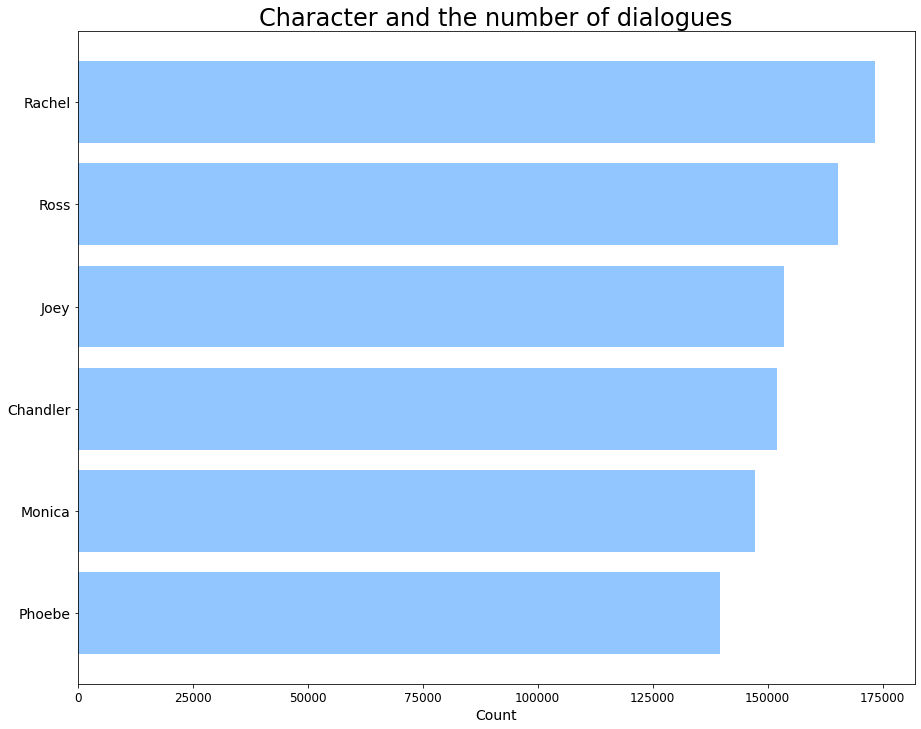

In [11]:
plot_style = 'seaborn-pastel'
plt.style.use(plot_style)

fig, ax = plt.subplots(figsize = (15, 12))

y_pos = np.arange(len(characters))

ax.barh(y_pos, word_count, align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(characters, size = 14)
ax.tick_params(axis = 'x', labelsize = 12)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count', size = 14)
ax.set_title('Character and the number of dialogues', size = 24, weight = 500, ha = 'center')

plt.show()

In [12]:
stop_words = ENGLISH_STOP_WORDS.union(['ve', 'do', 'doin', 'ser', 'goin', 'eh', 'gon',
                                       'na', 'eh', 'don', 'ca', 'didn', 'ta', 'ye', 'll', 'nan', 'thank'])       # avoiding tokenized contractions

In [13]:
def word_cloud(character):        # function to generate word clouds
  character_name = character
  word_list = data[data['Speaker'] == character_name]
  word_list = word_list['Tokenized Words Alphanumeric'].tolist()        # list of words spoken by a particular character

  words = []
  for i in word_list:
    words.extend(i)
  words = ''.join(i.lower() + ' ' for i in words)

  wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, 
                        max_words = 50, max_font_size = 40, scale = 3, 
                        random_state = 1).generate(words)       

  fig_title = ''.join(i.capitalize() + ' ' for i in character_name.split(' '))
  fig_title = fig_title.center(155)
  fig, ax = plt.subplots(figsize = (20, 20))
  
  plt.imshow(wordcloud, interpolation = 'bilinear')
  ax.text(0, 1.12, fig_title, transform = ax.transAxes, size = 20, weight = 600)
  plt.axis('off')
  plt.show()

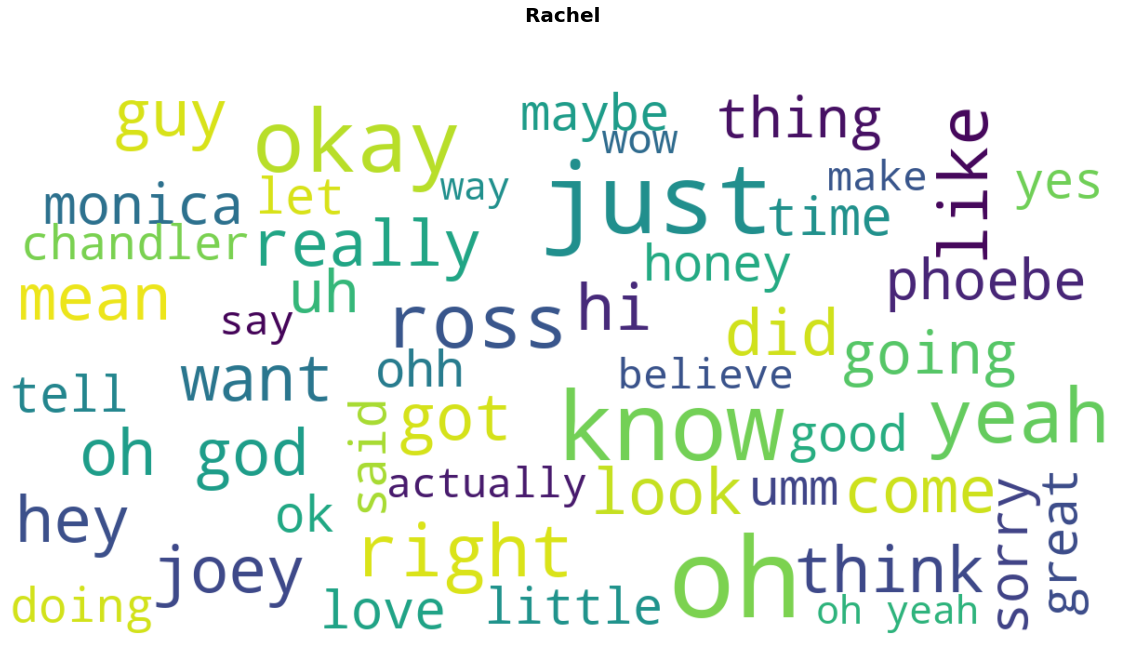

In [14]:
word_cloud(characters[0])       # rachel

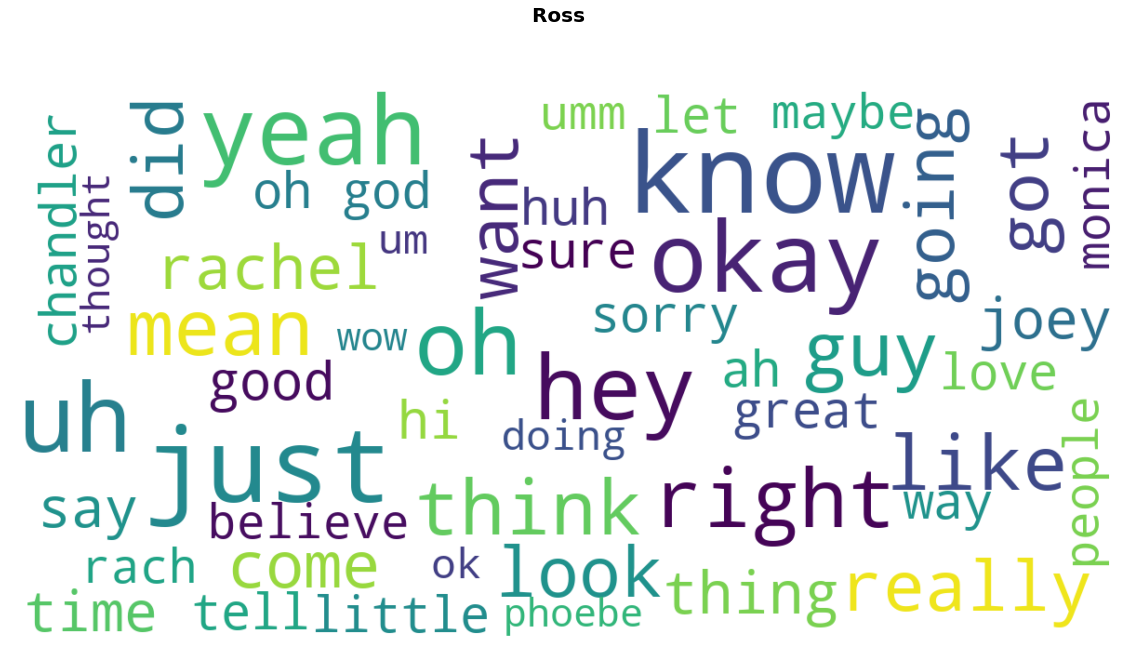

In [15]:
word_cloud(characters[1])       # ross

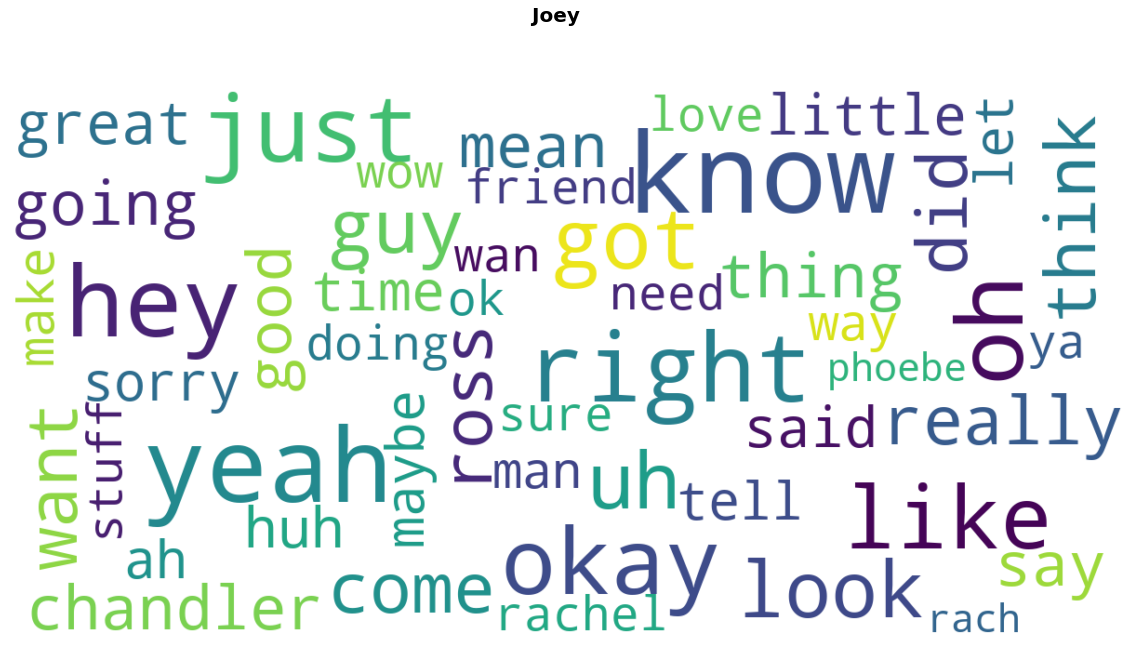

In [16]:
word_cloud(characters[2])       # joey

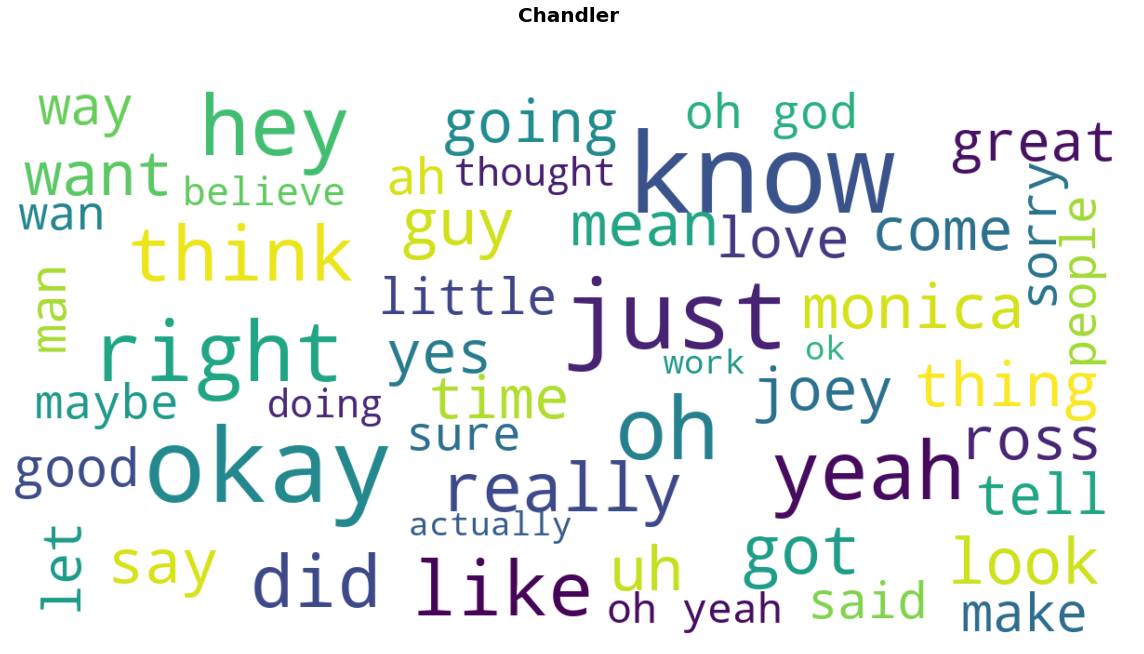

In [17]:
word_cloud(characters[3])       # chandler

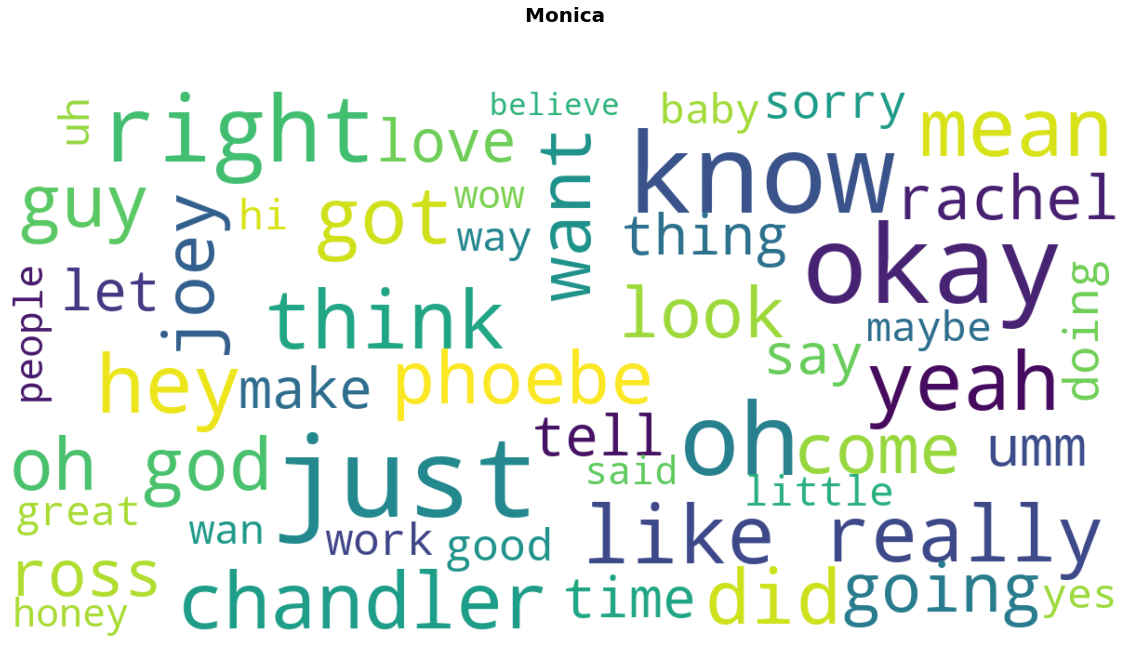

In [18]:
word_cloud(characters[4])       # monica

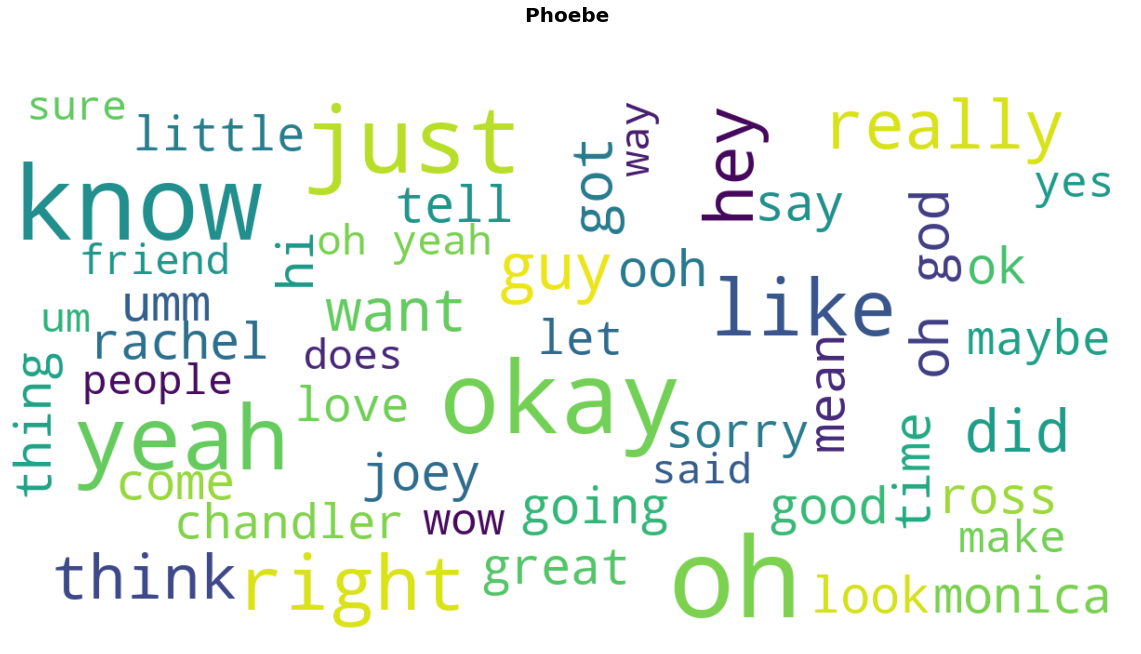

In [19]:
word_cloud(characters[5])       # phoebe

In [20]:
'''
for i in characters:
  word_cloud(i)
'''

'\nfor i in characters:\n  word_cloud(i)\n'

In [21]:
data['Sentiment'] = data['Text'].apply(lambda row: TextBlob(row).sentiment)        # column with sentiment scores (polarity, subjectivity)
data['Polarity'] = data['Sentiment'].apply(lambda row: row[0])        # column with polarity
data['Subjectivity'] = data['Sentiment'].apply(lambda row: row[1])        # column with subjectivity

In [22]:
data.head()

,Unnamed: 0,Location,Scene,Season,Speaker,Text,Tokenized Sentences,Tokenized Words Alphanumeric,Word Count,Sentiment,Polarity,Subjectivity
0,0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?,"[What, ?]",[What],1,"(0.0, 0.0)",0.0,0.00
1,1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?","[Oh, ,, you, got, the, whole, night, ,, huh, ?]","[Oh, you, got, the, whole, night, huh]",7,"(0.2, 0.4)",0.2,0.40
2,2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g...","[Phoebe, is, going, to, say, ``, yes, '', ?, T...","[Phoebe, is, going, to, say, yes, That, that, ...",9,"(1.0, 0.75)",1.0,0.75
3,3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.,"[Yeah, .]",[Yeah],1,"(0.0, 0.0)",0.0,0.00
4,4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!,"[Oh, !]",[Oh],1,"(0.0, 0.0)",0.0,0.00


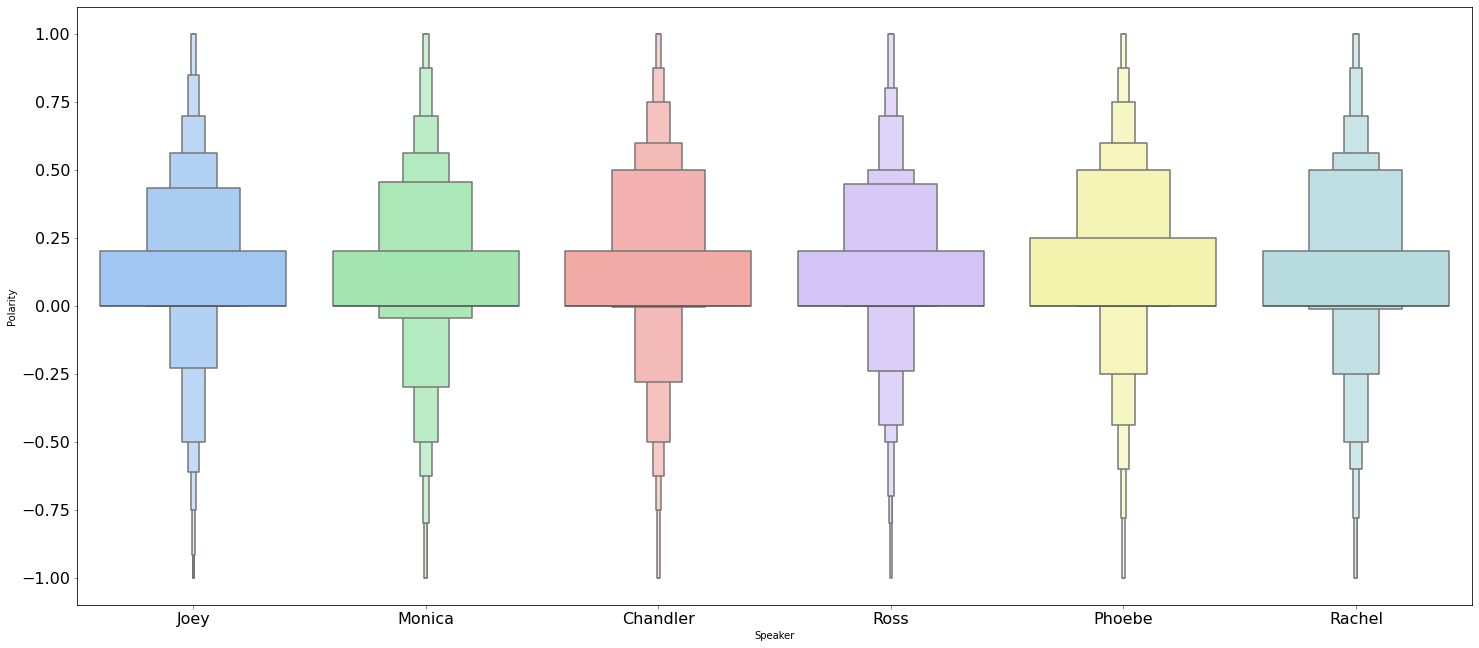

In [23]:
fig, ax = plt.subplots(figsize = (25, 11))
ax.tick_params(axis ='x', labelsize = 16, color = '#777777')
ax.tick_params(axis = 'y', labelsize = 16, color = '#777777')
sns.boxenplot(x = 'Speaker', y = 'Polarity', data = data)
plt.show()


In [24]:
data['Positive'] = data['Polarity'].apply(lambda row: 1 if row >= 0.5 else 0)       # 1 for positivity
data['Negative'] = data['Polarity'].apply(lambda row: 1 if row <= -0.5 else 0)        # 1 for negativity
data['Neutral'] = data['Polarity'].apply(lambda row: 1 if row >= -0.5 and row < 0.5 else 0)       # 1 for neutrality

In [25]:
data.head()

,Unnamed: 0,Location,Scene,Season,Speaker,Text,Tokenized Sentences,Tokenized Words Alphanumeric,Word Count,Sentiment,Polarity,Subjectivity,Positive,Negative,Neutral
0,0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?,"[What, ?]",[What],1,"(0.0, 0.0)",0.0,0.00,0,0,1
1,1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?","[Oh, ,, you, got, the, whole, night, ,, huh, ?]","[Oh, you, got, the, whole, night, huh]",7,"(0.2, 0.4)",0.2,0.40,0,0,1
2,2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g...","[Phoebe, is, going, to, say, ``, yes, '', ?, T...","[Phoebe, is, going, to, say, yes, That, that, ...",9,"(1.0, 0.75)",1.0,0.75,1,0,0
3,3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.,"[Yeah, .]",[Yeah],1,"(0.0, 0.0)",0.0,0.00,0,0,1
4,4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!,"[Oh, !]",[Oh],1,"(0.0, 0.0)",0.0,0.00,0,0,1


In [26]:
character_polarity = data.groupby(['Speaker'])['Positive', 'Negative', 'Neutral'].sum().reset_index()       # sum up polarities

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [27]:
character_polarity['Positivity Rate'] = character_polarity['Positive'] / (character_polarity['Positive'] + character_polarity['Negative'] + 
                                                                          character_polarity['Neutral'])      # propotion of polarities
character_polarity['Negativity Rate'] = character_polarity['Negative'] / (character_polarity['Positive'] + character_polarity['Negative'] + 
                                                                          character_polarity['Neutral'])
character_polarity['Neutrality Rate'] = character_polarity['Neutral'] / (character_polarity['Positive'] + character_polarity['Negative'] + 
                                                                          character_polarity['Neutral'])

In [28]:
character_polarity.sort_values(by = ['Positivity Rate'], ascending = [0])       # characters by positivity 

,Speaker,Positive,Negative,Neutral,Positivity Rate,Negativity Rate,Neutrality Rate
3,Phoebe,1860,401,11525,0.134919,0.029087,0.835993
0,Chandler,1954,523,13109,0.125369,0.033556,0.841075
4,Rachel,2145,574,14600,0.123852,0.033143,0.843005
2,Monica,1834,559,13184,0.117738,0.035886,0.846376
5,Ross,1956,485,14485,0.115562,0.028654,0.855784
1,Joey,1694,480,13240,0.109900,0.031141,0.858959


In [29]:
character_polarity.sort_values(by = ['Negativity Rate'], ascending = [0])       # characters by negativity

,Speaker,Positive,Negative,Neutral,Positivity Rate,Negativity Rate,Neutrality Rate
2,Monica,1834,559,13184,0.117738,0.035886,0.846376
0,Chandler,1954,523,13109,0.125369,0.033556,0.841075
4,Rachel,2145,574,14600,0.123852,0.033143,0.843005
1,Joey,1694,480,13240,0.109900,0.031141,0.858959
3,Phoebe,1860,401,11525,0.134919,0.029087,0.835993
5,Ross,1956,485,14485,0.115562,0.028654,0.855784
